In [5]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing

In [6]:

url_link = 'https://docs.google.com/spreadsheets/d/1TAWfdKnWYiCzKUeDyGL6NzIOv7AxFt_Sfzzax464_FQ/export?format=csv&gid=882919979'

telco = pd.read_csv(url_link)

In [7]:
pd.options.display.max_columns = 999

In [8]:
telco.head()

,customerID,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,InternationalPlan,VoiceMailPlan,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,No,0,168.8,137,241.4,107,204.8,106,15.5,4,0,354,705,119,593.3,No
1,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,No,0,122.2,112,131.7,94,169.5,106,10.3,9,5,326,292,75,280.9,Yes
2,0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),No,Yes,36,178.7,134,178.6,102,126.8,82,8.0,4,2,324,1840,257,571.5,No
3,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No,No,0,190.2,68,262.2,64,130.0,92,8.8,4,0,228,1389,180,7904.3,No
4,0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,No,0,67.7,68,195.7,86,236.5,137,12.0,2,1,294,170,1,340.4,No


In [9]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'MaritalStatus', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'InternationalPlan', 'VoiceMailPlan',
       'NumbervMailMessages', 'TotalDayMinutes', 'TotalDayCalls',
       'TotalEveMinutes', 'TotalEveCalls', 'TotalNightMinutes',
       'TotalNightCalls', 'TotalIntlMinutes', 'TotalIntlCalls',
       'CustomerServiceCalls', 'TotalCall', 'TotalHighBandwidthMinutes',
       'TotalHighLatencyMinutes', 'TotalRevenue', 'Churn'],
      dtype='object')

In [10]:
telco.isnull().sum().sum()

5

In [11]:
telco.dropna(inplace = True)

In [12]:
telco.isnull().sum().sum()

0

In [13]:
telco

,customerID,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,InternationalPlan,VoiceMailPlan,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,No,0,168.8,137,241.4,107,204.8,106,15.5,4,0,354,705,119,593.3,No
1,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,No,0,122.2,112,131.7,94,169.5,106,10.3,9,5,326,292,75,280.9,Yes
2,0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),No,Yes,36,178.7,134,178.6,102,126.8,82,8.0,4,2,324,1840,257,571.5,No
3,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No,No,0,190.2,68,262.2,64,130.0,92,8.8,4,0,228,1389,180,7904.3,No
4,0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,No,0,67.7,68,195.7,86,236.5,137,12.0,2,1,294,170,1,340.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,9979-RGMZT,Female,0,No,No,7,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,No,No,0,90.5,142,211.7,75,194.9,76,9.3,2,1,296,817,106,633.5,No
3329,9986-BONCE,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),No,No,0,85.7,112,221.6,70,190.6,75,11.6,3,4,264,0,0,85.5,Yes
3330,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,No,No,0,197.9,84,168.1,113,239.8,145,12.0,6,1,349,241,48,742.9,No
3331,9992-UJOEL,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,No,Yes,14,93.6,137,193.8,72,144.9,84,17.5,5,1,299,86,19,92.8,No


In [14]:
telco.drop(columns = 'customerID', inplace = True)

In [15]:
telco.duplicated().sum()

0

In [16]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328 entries, 0 to 3332
Data columns (total 34 columns):
gender                       3328 non-null object
SeniorCitizen                3328 non-null int64
MaritalStatus                3328 non-null object
Dependents                   3328 non-null object
tenure                       3328 non-null int64
PhoneService                 3328 non-null object
MultipleLines                3328 non-null object
InternetService              3328 non-null object
OnlineSecurity               3328 non-null object
OnlineBackup                 3328 non-null object
DeviceProtection             3328 non-null object
TechSupport                  3328 non-null object
StreamingTV                  3328 non-null object
StreamingMovies              3328 non-null object
Contract                     3328 non-null object
PaperlessBilling             3328 non-null object
PaymentMethod                3328 non-null object
InternationalPlan            3328 non-null ob

In [17]:
telco.describe()

,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue
count,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000
mean,0.110276,28.043570,8.093750,179.762560,100.435096,200.989423,100.124099,200.888431,100.117488,10.236689,4.479567,1.562200,306.718450,543.793870,87.815204,1673.303966
std,0.313281,23.254351,13.686809,54.504315,20.069012,50.701053,19.925875,50.586542,19.571538,2.793326,2.462133,1.315228,34.441559,800.298045,155.726500,1920.041912
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,194.000000,0.000000,0.000000,18.800000
25%,0.000000,7.000000,0.000000,143.600000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000,284.000000,0.000000,0.000000,252.600000
50%,0.000000,23.000000,0.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000,307.000000,171.000000,19.000000,892.450000
75%,0.000000,48.000000,20.000000,216.600000,114.000000,235.300000,114.000000,235.400000,113.000000,12.100000,6.000000,2.000000,330.000000,667.500000,86.250000,2433.925000
max,1.000000,72.000000,51.000000,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,418.000000,2998.000000,1001.000000,8476.500000


In [18]:
telco.Churn.value_counts()

No     2675
Yes     653
Name: Churn, dtype: int64

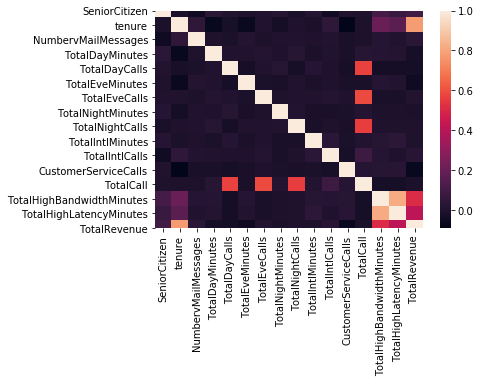

In [142]:
sns.heatmap(telco.corr());

In [19]:
telco.corr()

,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue
SeniorCitizen,1.000000,-0.007550,-0.044331,0.033661,0.013736,0.000533,0.005463,0.020408,-0.013046,0.019556,-0.041306,0.009245,0.001151,0.109540,0.076044,0.094891
tenure,-0.007550,1.000000,0.047487,-0.062990,-0.019978,-0.062218,0.006237,-0.026555,0.003227,-0.011186,0.044110,-0.088069,-0.006409,0.207180,0.167894,0.780984
NumbervMailMessages,-0.044331,0.047487,1.000000,0.000909,-0.010772,0.017082,-0.005908,0.007169,0.007193,0.002339,0.013677,-0.013799,-0.005157,0.018212,0.006394,0.031448
TotalDayMinutes,0.033661,-0.062990,0.000909,1.000000,0.006869,0.006997,0.016070,0.004502,0.023239,-0.010060,0.008304,-0.013503,0.026583,0.018505,0.014783,-0.022563
TotalDayCalls,0.013736,-0.019978,-0.010772,0.006869,1.000000,-0.022263,0.006730,0.023180,-0.020235,0.021576,0.004493,-0.020145,0.574645,-0.027014,-0.025603,-0.032686
TotalEveMinutes,0.000533,-0.062218,0.017082,0.006997,-0.022263,1.000000,-0.010326,-0.012295,0.007673,-0.010639,0.003255,-0.012844,-0.014844,0.020324,0.011492,-0.043716
TotalEveCalls,0.005463,0.006237,-0.005908,0.016070,0.006730,-0.010326,1.000000,-0.002781,0.007392,0.008268,0.016646,0.002670,0.587956,-0.014197,-0.015786,0.013100
TotalNightMinutes,0.020408,-0.026555,0.007169,0.004502,0.023180,-0.012295,-0.002781,1.000000,0.011628,-0.015742,-0.012756,-0.008483,0.017270,-0.005791,-0.005286,-0.010816
TotalNightCalls,-0.013046,0.003227,0.007193,0.023239,-0.020235,0.007673,0.007392,0.011628,1.000000,-0.013416,-0.000122,-0.013648,0.560210,0.001713,0.000854,0.003779
TotalIntlMinutes,0.019556,-0.011186,0.002339,-0.010060,0.021576,-0.010639,0.008268,-0.015742,-0.013416,1.000000,0.031932,-0.009494,0.011652,0.024948,0.041968,-0.000025


In [20]:
X = telco.drop(columns = 'Churn')
y = telco.Churn

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [23]:
abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)

ValueError: could not convert string to float: 'Male'

In [121]:
logreg = LogisticRegression(C=1e9, solver='lbfgs')
feature_cols = ['TotalHighBandwidthMinutes' ]
X = telco[feature_cols]
y = telco.Churn
logreg.fit(X, y)
telco['Log_Prediction'] = logreg.predict(X)
telco['Log_probabilities'] = logreg.predict_proba(X)[:,1]

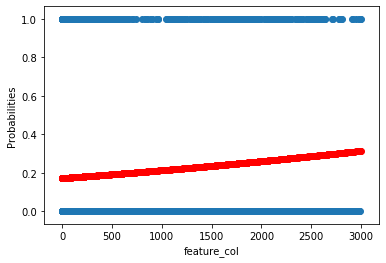

In [122]:
plt.scatter(telco[feature_cols], telco.Churn)
plt.scatter(telco[feature_cols], telco.Log_probabilities, color='red')
plt.xlabel('feature_col')
plt.ylabel('Probabilities')
plt.show()

In [126]:
clf = LogisticRegression(random_state=0).fit(X, y)
clf.coef_

C:\Users\Akshay Indusekar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-1.23406922e-01,  1.84926916e-01,  2.07962647e-01,
        -5.45397273e-02, -1.00727661e-01,  0.00000000e+00,
        -4.10721228e-01,  1.37644195e-01, -1.74419736e-01,
        -2.88135869e-02,  8.16944522e-02, -4.90440372e-02,
        -7.68619376e-01,  3.86911999e-01, -2.30871066e+00,
         3.61157143e-01, -9.35387692e-02,  1.26812723e+00,
        -1.34112958e+00,  1.04486239e-02,  7.48861463e-03,
        -4.85423774e-02,  3.14747831e-03, -5.05680509e-02,
         1.88408696e-03, -5.14250023e-02,  3.42959145e-02,
        -9.06576206e-02,  2.90973835e-01,  4.97807837e-02,
         4.39912866e-04,  1.26212858e-03,  1.08528209e-03,
         0.00000000e+00, -6.37622363e-01]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
array_to_df = ohc.fit_transform(churn_df).toarray()
pd.DataFrame(array_to_df, columns=ohc.get_feature_names())

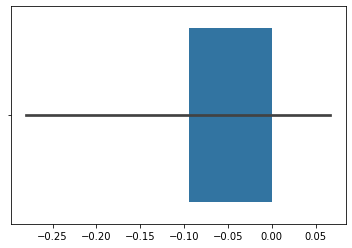

In [128]:
sns.barplot(clf.coef_)

In [123]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

KeyboardInterrupt: 

In [78]:
label_encoder = preprocessing.LabelEncoder()

In [79]:
telco['Churn']= label_encoder.fit_transform(telco['Churn']) 
  
telco['Churn'].unique() 

array([0, 1], dtype=int64)

In [81]:
telco['gender']= label_encoder.fit_transform(telco['gender']) 
  
telco['gender'].unique() 

array([0, 1], dtype=int64)

In [82]:
telco['MaritalStatus']= label_encoder.fit_transform(telco['MaritalStatus']) 
  
telco['MaritalStatus'].unique() 

array([1, 0], dtype=int64)

In [83]:
telco['Dependents']= label_encoder.fit_transform(telco['Dependents']) 
  
telco['Dependents'].unique() 

array([1, 0], dtype=int64)

In [85]:
telco['PhoneService']= label_encoder.fit_transform(telco['PhoneService']) 
  
telco['PhoneService'].unique() 

array([0], dtype=int64)

In [87]:
telco['MultipleLines']= label_encoder.fit_transform(telco['MultipleLines']) 
  
telco['MultipleLines'].unique() 

array([0, 1], dtype=int64)

In [90]:
telco['PaperlessBilling']= label_encoder.fit_transform(telco['PaperlessBilling']) 
  
telco['PaperlessBilling'].unique() 

array([1, 0], dtype=int64)

In [91]:
telco['InternationalPlan']= label_encoder.fit_transform(telco['InternationalPlan']) 
  
telco['InternationalPlan'].unique() 

array([0, 1], dtype=int64)

In [93]:
telco['VoiceMailPlan']= label_encoder.fit_transform(telco['VoiceMailPlan']) 
  
telco['VoiceMailPlan'].unique() 

array([0, 1], dtype=int64)

In [95]:
telco['OnlineSecurity']= label_encoder.fit_transform(telco['OnlineSecurity']) 
  
telco['OnlineSecurity'].unique() 

array([0, 2, 1], dtype=int64)

In [96]:
telco['OnlineBackup']= label_encoder.fit_transform(telco['OnlineBackup']) 
  
telco['OnlineBackup'].unique() 

array([2, 0, 1], dtype=int64)

In [98]:
telco['DeviceProtection']= label_encoder.fit_transform(telco['DeviceProtection']) 
  
telco['DeviceProtection'].unique() 

array([0, 2, 1], dtype=int64)

In [100]:
telco['TechSupport']= label_encoder.fit_transform(telco['TechSupport']) 
  
telco['TechSupport'].unique() 

array([2, 0, 1], dtype=int64)

In [101]:
telco['StreamingTV']= label_encoder.fit_transform(telco['StreamingTV']) 
  
telco['StreamingTV'].unique() 

array([2, 0, 1], dtype=int64)

In [102]:
telco['StreamingMovies']= label_encoder.fit_transform(telco['StreamingMovies']) 
  
telco['StreamingMovies'].unique() 

array([0, 2, 1], dtype=int64)

In [104]:
telco['Contract']= label_encoder.fit_transform(telco['Contract']) 
  
telco['Contract'].unique() 

array([1, 0, 2], dtype=int64)

In [107]:
telco['PaymentMethod']= label_encoder.fit_transform(telco['PaymentMethod']) 
  
telco['PaymentMethod'].unique() 

array([3, 2, 1, 0], dtype=int64)

In [114]:
telco['InternetService']= label_encoder.fit_transform(telco['InternetService']) 
  
telco['InternetService'].unique() 

array([0, 1, 2], dtype=int64)

In [116]:
telco['Log_Prediction']= label_encoder.fit_transform(telco['Log_Prediction']) 
  
telco['Log_Prediction'].unique() 

array([0], dtype=int64)

NameError: name 'x_train' is not defined

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
url_link = 'https://docs.google.com/spreadsheets/d/1TAWfdKnWYiCzKUeDyGL6NzIOv7AxFt_Sfzzax464_FQ/export?format=csv&gid=882919979'
test = pd.read_csv(url_link)
test.dropna(inplace = True)
cat_var = test.select_dtypes(include='object')
num_var = test.select_dtypes(exclude = 'object')
cat_var.drop(columns=['customerID','Churn'], inplace = True)
X_train, X_test, y_train, y_test = train_test_split(test.drop(columns=['customerID','Churn']), test.Churn, test_size=0.33, random_state=42)
ohc = OneHotEncoder(drop='first')
array_to_df = ohc.fit_transform(X_train[cat_var.columns.tolist()]).toarray()
encoded=pd.DataFrame(array_to_df, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)
clean_X_train = pd.concat([X_train[num_var.columns.tolist()] , encoded], axis=1,  sort=False)
clean_X_train.shape


C:\Users\Akshay Indusekar\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2229, 42)

In [52]:
abc = AdaBoostClassifier(random_state=42)
abc.fit(clean_X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [72]:
abc.score(clean_X_train,y_train)

0.8968147151188874

In [32]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(clean_X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [73]:
gbc.score(clean_X_train,y_train)

0.9515477792732167

In [33]:
from xgboost import XGBClassifier

In [35]:
xgb = XGBClassifier(random_state=42)
xgb.fit(clean_X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [74]:
xgb.score(clean_X_train,y_train)

1.0

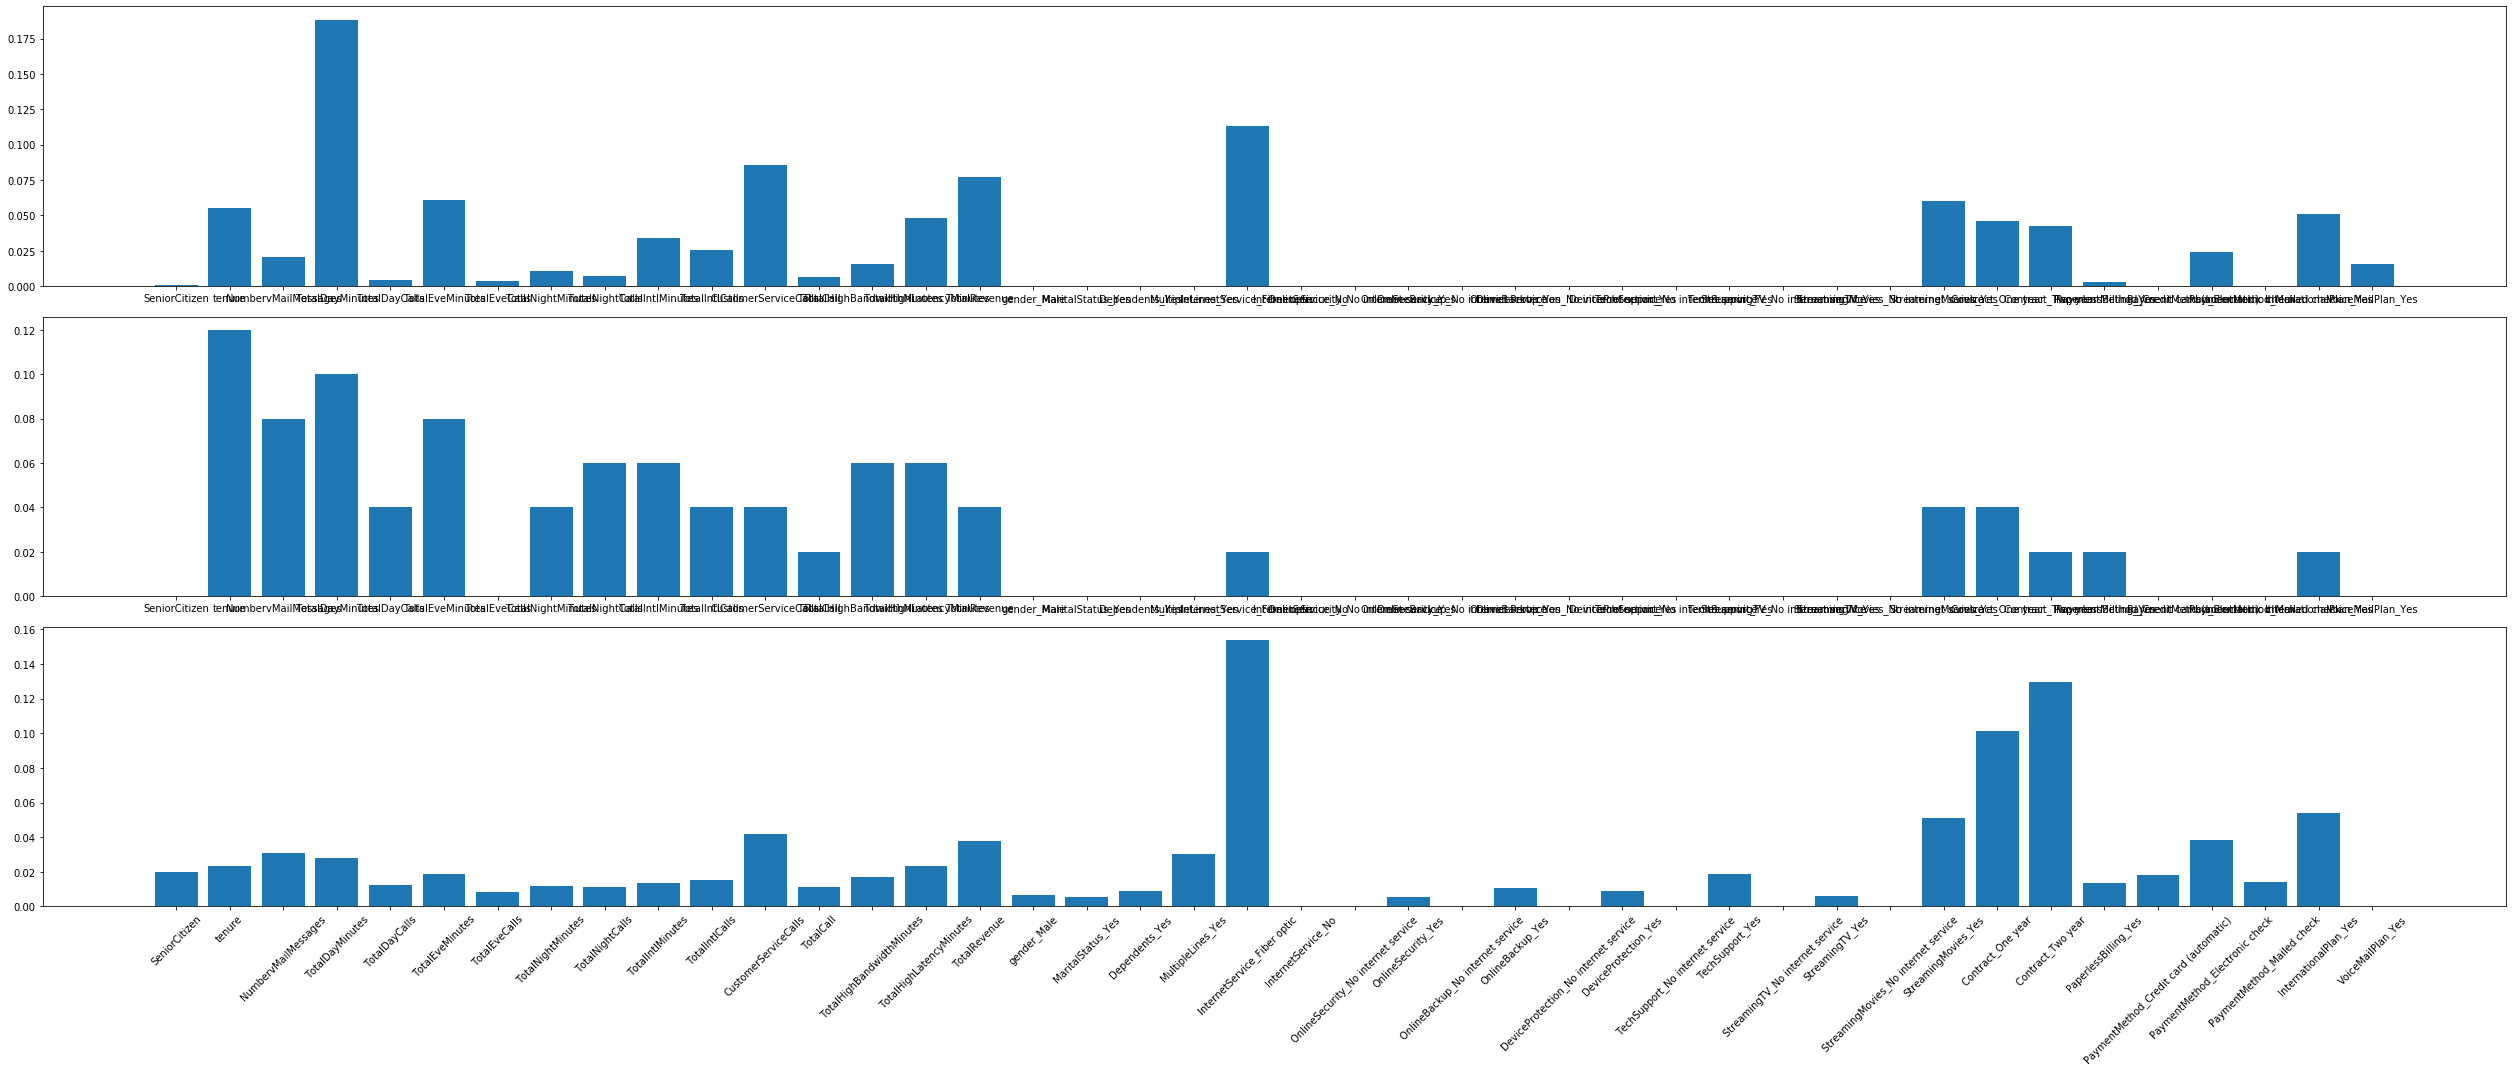

In [50]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(35, 15))
plt.xticks(rotation = 'vertical')
ax[0].bar(height=gbc.feature_importances_, x=clean_X_train.columns)
plt.xticks(rotation = 'vertical')
ax[1].bar(height=abc.feature_importances_, x=clean_X_train.columns)
plt.xticks(rotation = 45)
ax[2].bar(height=xgb.feature_importances_, x=clean_X_train.columns)

plt.tight_layout()


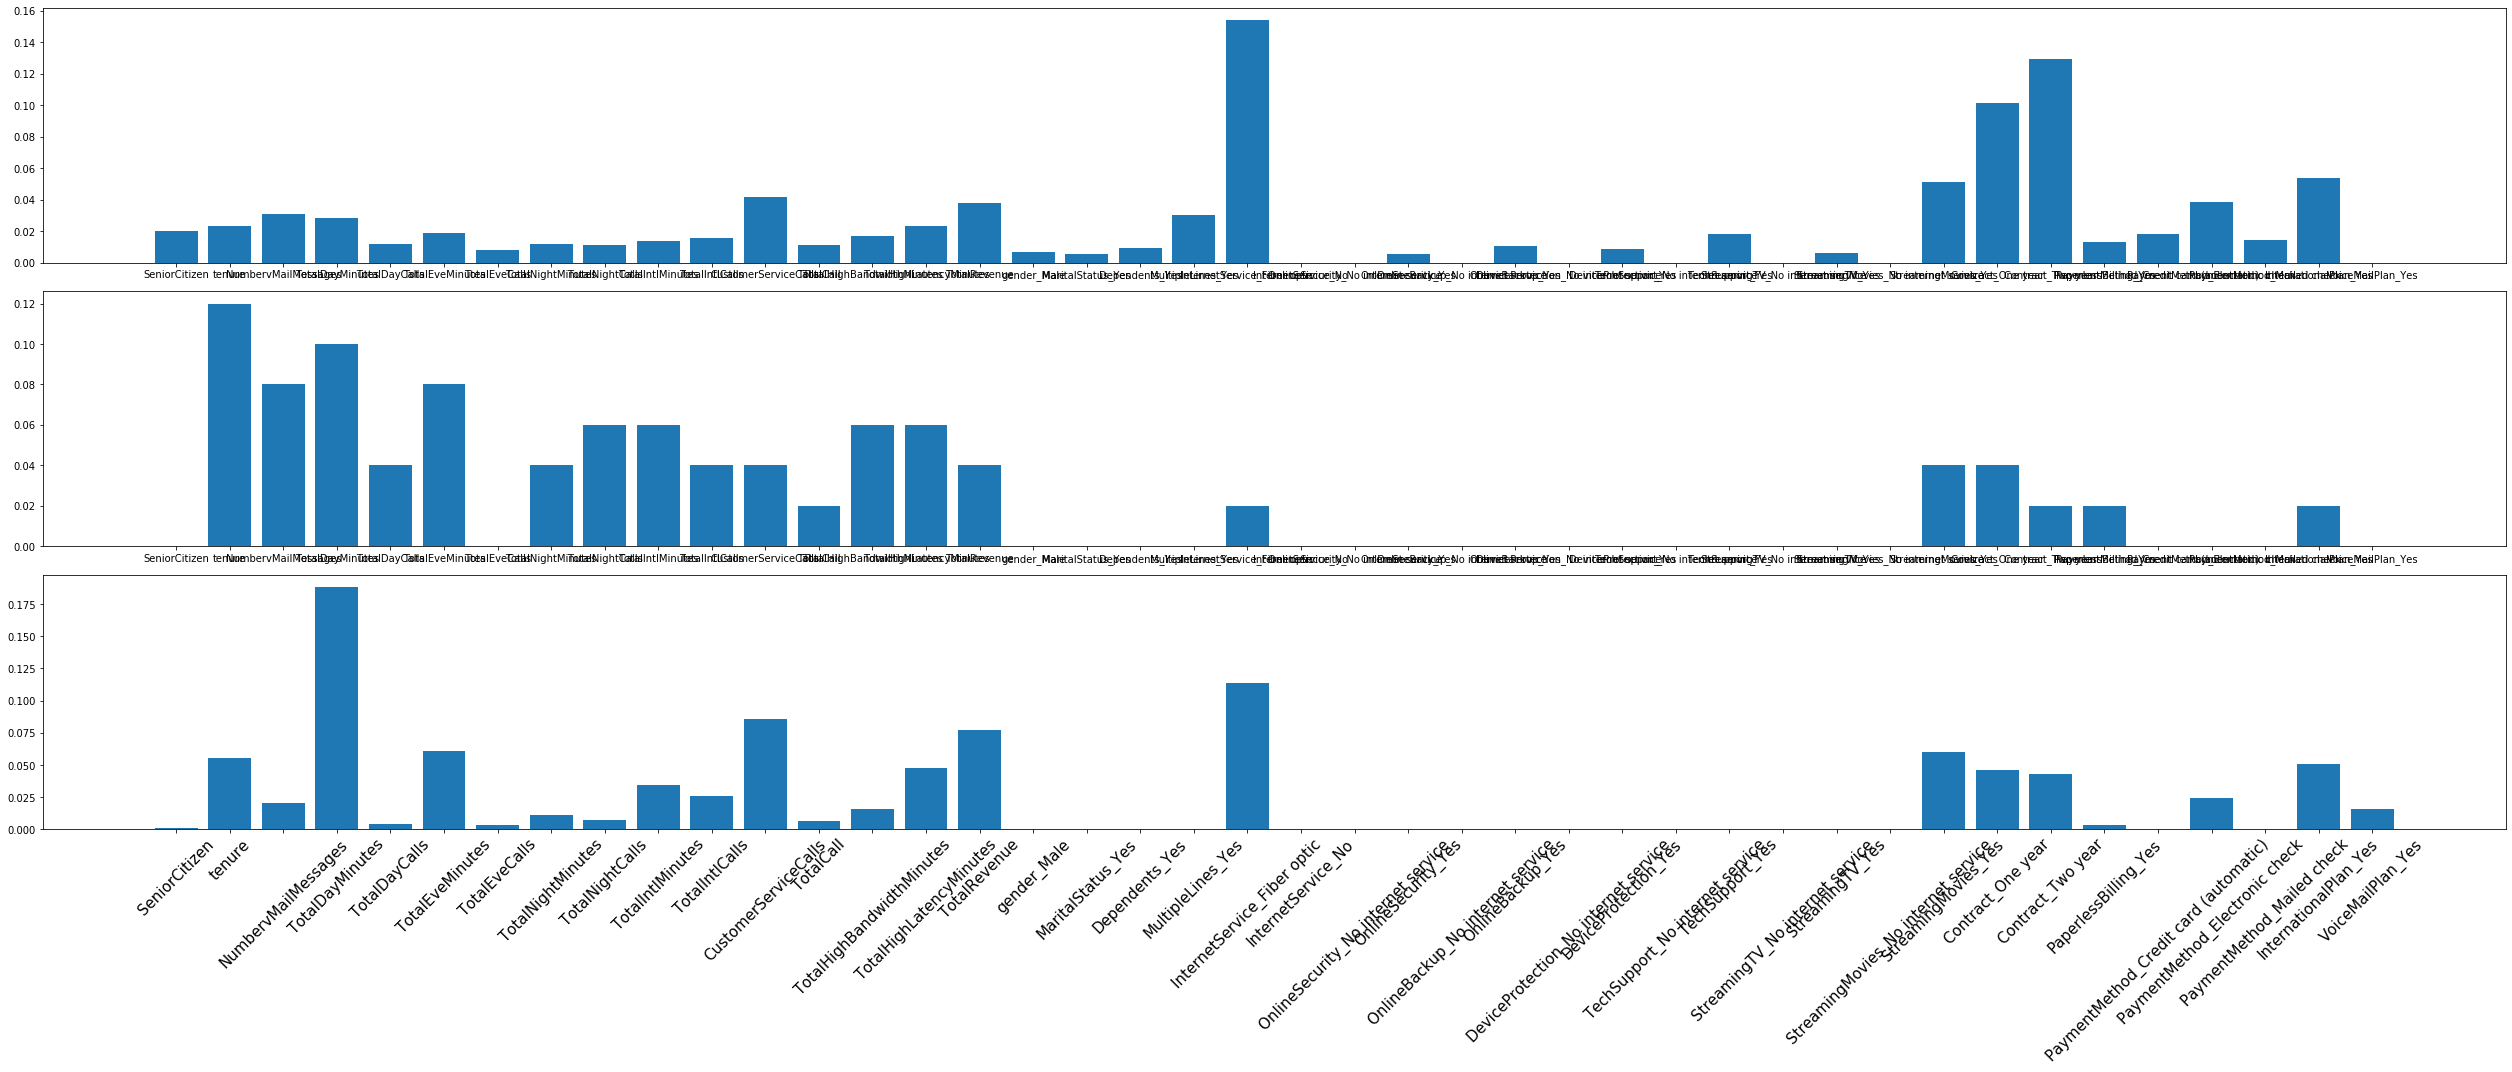

In [81]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(35, 15))

ax[0].bar(height=xgb.feature_importances_, x=clean_X_train.columns)
ax[1].bar(height=abc.feature_importances_, x=clean_X_train.columns)
plt.xticks(rotation = 45, fontsize = 15)
ax[2].bar(height=gbc.feature_importances_, x=clean_X_train.columns)

plt.tight_layout()

In [ ]:
for ax_num in ax:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)


In [ ]:
totaldayminutes, multipleLines_Yes